In [3]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pyplot as plt

from ga import Population
import strategies as S

### Lets evolve popupation consisting of deterministic threshold based proposers and responders

In [77]:
p = Population(mutation_strength=0.02)

In [78]:
p.add_strategy(S.ThresProposer, 100)

In [79]:
p.add_strategy(S.ThresResponder, 100)

In [81]:
import numpy as np
class Logger:
    def __init__(self, extractor):
        self.extractor = extractor
        self.k = 1
        self.log = []
    
    def log_population(self, p):
        for v in p:
            self.log.append((self.k, self.extractor(v)))
        self.k += 1
        
    def draw(self):
        pts = np.array(self.log)
        plt.scatter(pts[:, 0], pts[:, 1], s=0.5)

    

In [82]:
prop_logger = Logger(lambda x: x.proposition)
resp_logger = Logger(lambda x: x.accept_bound)

In [83]:
prop_logger.log_population(p.proposers)

In [84]:
for k in range(500):
    p.evolve()
    prop_logger.log_population(p.proposers)
    resp_logger.log_population(p.responders)

Text(0.5, 1.0, 'threshold distribution among proposers')

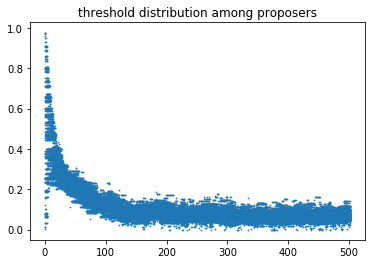

In [87]:
prop_logger.draw()
plt.title('threshold distribution among proposers')

Text(0.5, 1.0, 'accept bound distribution among responders')

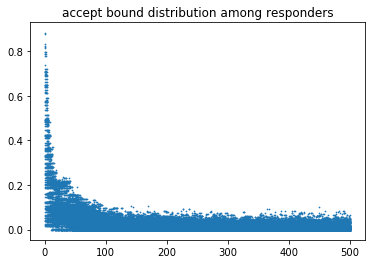

In [88]:
resp_logger.draw()
plt.title('accept bound distribution among responders')

Text(0.5, 1.0, 'mean proposal evolution')

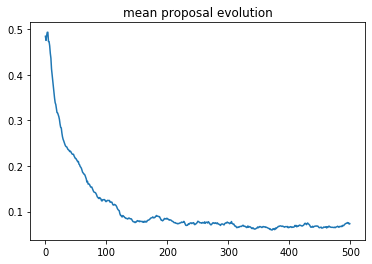

In [90]:
plt.plot(p.prop_mean_log)
plt.title('mean proposal evolution')

### Lets try probabilistic strategies

In [27]:
p2 = Population(mutation_strength=0.02)

In [17]:
p.add_strategy(S.ThresProposer, 100)
p.add_strategy(S.ThresResponder, 100)

In [28]:
p2.add_strategy(S.ProbProposer, 100)
p2.add_strategy(S.ProbResponder, 100)

In [29]:
from tqdm import tqdm
for k in tqdm(range(10000)):
    p2.evolve()

  1%|          | 110/10000 [00:01<02:45, 59.62it/s]/home/dvyal/coding/ultimatum/ga/strategies.py:40: RuntimeWarning: invalid value encountered in true_divide
  self.proposition_probs /= np.sum(self.proposition_probs)
100%|██████████| 10000/10000 [02:51<00:00, 58.22it/s]


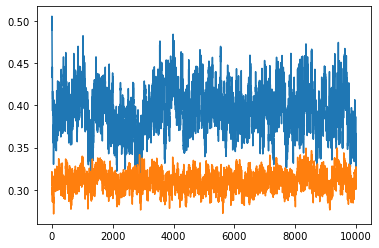

In [30]:
plt.plot(p2.prop_mean_log)
plt.plot(p2.prop_std_log)

Text(0.5, 1.0, 'proposal probability density')

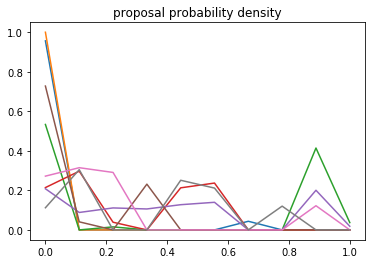

In [99]:
for k in range(8):
    plt.plot(np.linspace(0,1,10), p2.proposers[k].proposition_probs)
plt.title('proposal probability density')

So seems diversity is more or less preserved

### Lets start with a mixture of deterministic and probabilistic strategies

In [18]:
p3 = Population(mutation_strength=0.02)

In [19]:
p3.add_strategy(S.ThresProposer, 100)
p3.add_strategy(S.ThresResponder, 100)
p3.add_strategy(S.ProbProposer, 100)
p3.add_strategy(S.ProbResponder, 100)

In [20]:
for k in range(500):
    p3.evolve()

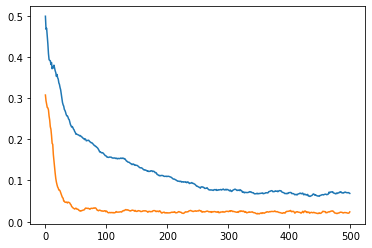

In [22]:
plt.plot(p3.prop_mean_log)
plt.plot(p3.prop_std_log)

Text(0.5, 1.0, 'number of probabilistic proposers')

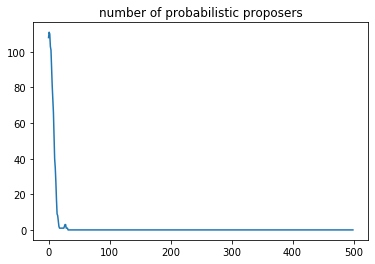

In [137]:
plt.plot([c['ProbProposer'] for c in p3.proposer_counters])
plt.title('number of probabilistic proposers')

In [116]:
import copy

In [117]:
p4 = copy.deepcopy(p2)

In [132]:
p4.add_strategy(S.ThresProposer, 45)

In [133]:
from tqdm import tqdm
for k in tqdm(range(1000)):
    p4.evolve()

100%|██████████| 1000/1000 [00:16<00:00, 62.44it/s]


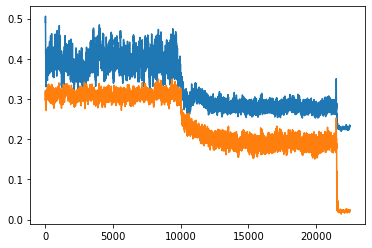

In [134]:
plt.plot(p4.prop_mean_log)
plt.plot(p4.prop_std_log)

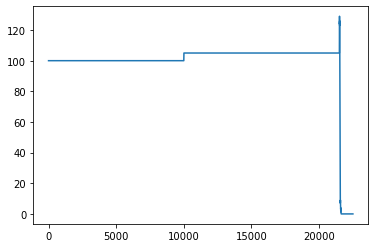

In [135]:
plt.plot([c['ProbProposer'] for c in p4.proposer_counters])

### let's try probabilistic proposer and deterministic responser

In [5]:
p6 = Population(mutation_strength=0.02)
p6.add_strategy(S.ThresResponder, 100)
p6.add_strategy(S.ProbProposer, 100)

In [6]:
from tqdm import tqdm
for k in tqdm(range(1000)):
    p6.evolve()

 50%|████▉     | 497/1000 [00:06<00:06, 75.57it/s]/home/dvyal/coding/ultimatum/ga/strategies.py:40: RuntimeWarning: invalid value encountered in true_divide
  self.proposition_probs /= np.sum(self.proposition_probs)
100%|██████████| 1000/1000 [00:13<00:00, 74.27it/s]


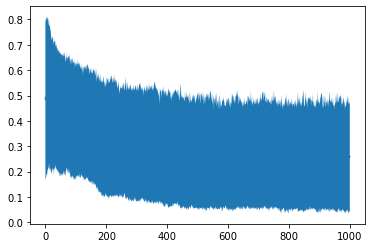

In [13]:
plt.plot(p6.prop_mean_log)
plt.fill_between(range(1000), np.array(p6.prop_mean_log) - np.array(p6.prop_std_log), 
                             np.array(p6.prop_mean_log) + np.array(p6.prop_std_log))

Text(0.5, 1.0, 'proposal probability density')

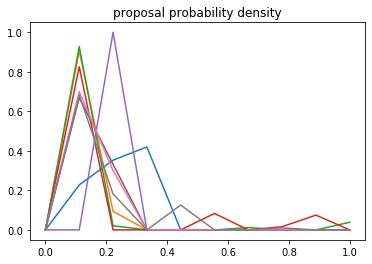

In [11]:
import numpy as np
for k in range(8):
    plt.plot(np.linspace(0,1,10), p6.proposers[k].proposition_probs)
plt.title('proposal probability density')